In [19]:
import ensembles
import importlib
importlib.reload(ensembles) #this is for notebooks - otherwise I have to restart the kernel every time I change anything


import networks
importlib.reload(networks) #this is for notebooks - otherwise I have to restart the kernel every time I change anything



import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 5]

from sklearn.model_selection import train_test_split

from sklearn.datasets import make_regression

In [20]:
num_epochs = 1500#200
#num_eps = 75#25#75
#seed = 43#43 is cool 101 1011
from global_vars import SEED as seed

params = {'num_neurons':[3],
          #'num_neurons':[10,10,10],
          'num_epochs':num_epochs,
          'learning_rate':0.1,
          'seed':seed,
         'optimizer':tf.train.AdamOptimizer,
    'initialisation_scheme':tf.truncated_normal
         }




ensemble = [{'num_neurons':[10,10,10],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10,10,10],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10,5,10],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10,5,20],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10,10,10,10],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10,10,5],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10,10],'num_epochs':num_epochs}]#,'optimizer':tf.train.AdamOptimizer}]
        
ensemble = [{'num_neurons':[2],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[3],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[4],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[5],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[6],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[7],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10],'num_epochs':num_epochs}]#,'optimizer':tf.train.AdamOptimizer}]
          
    
bootstrap_ensemble_stats = {'num_neurons':[10,10,10],'num_epochs':num_epochs,          'learning_rate':0.1,
'optimizer':tf.train.AdamOptimizer,
                            'initialisation_scheme':tf.truncated_normal}


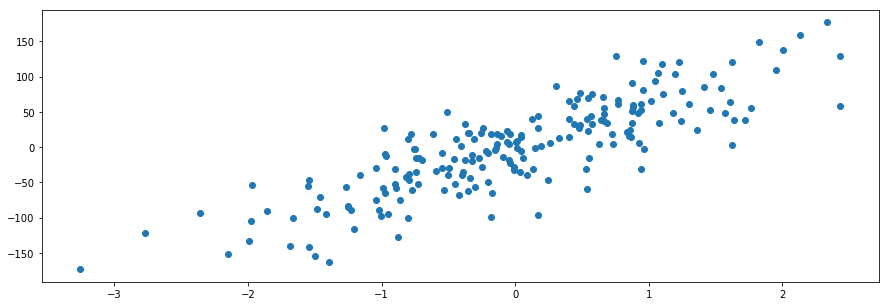

In [27]:
X, y = make_regression(n_samples=200, n_features=1, noise=35,random_state=430)#,n_informative=1,bias=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=430)
plt.scatter(X,y)

In [22]:
y_test.shape, X_test.shape

((60,), (60, 1))

# Vanilla Ensemble

(60,)
(60, 1)


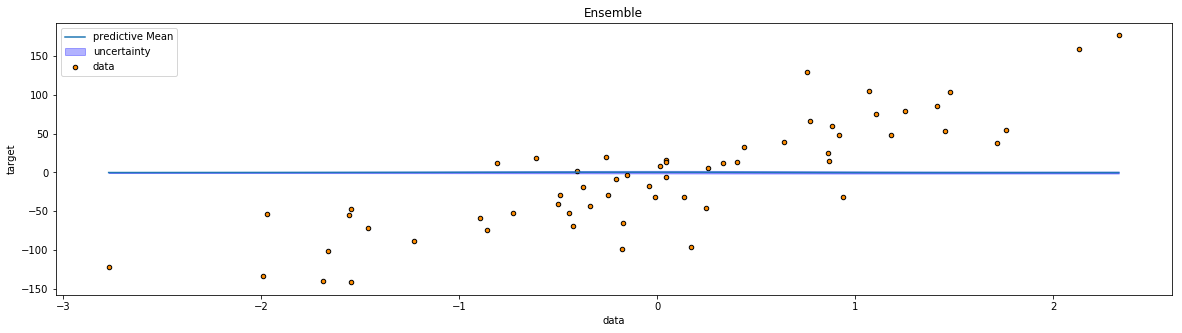

In [23]:
vanialla_ensemble = ensembles.VanillaEnsemble(estimator_stats = ensemble)
plot = vanialla_ensemble.ensemble_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))

(60,)
(60, 1)


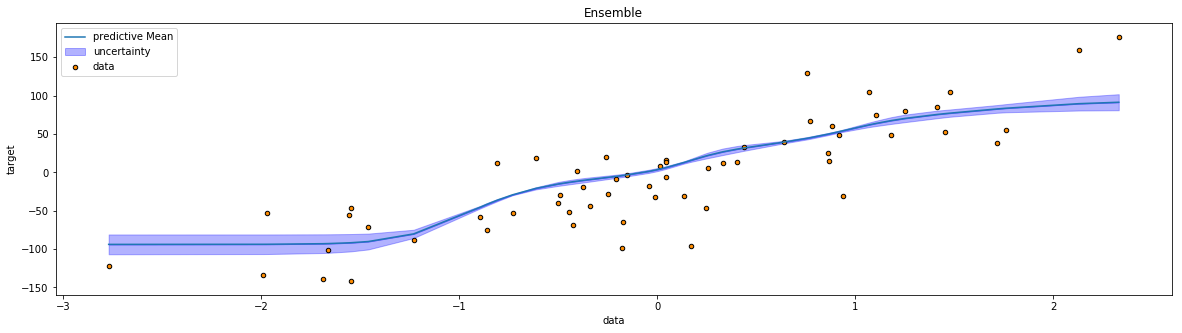

In [24]:
vanialla_ensemble.fit(X_train,y_train)
plot = vanialla_ensemble.ensemble_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))

In [25]:
vanialla_ensemble.self_evaluate(X_test,y_test)


{'NLPD': -1358.8874707815214,
 'correlation between error and variance': 0.029747937931092528,
 'coverage probability': 0.06666666666666667,
 'rsme': 89.28102040948981}

# Bootstrap Ensemble

(60,)
(60, 1)


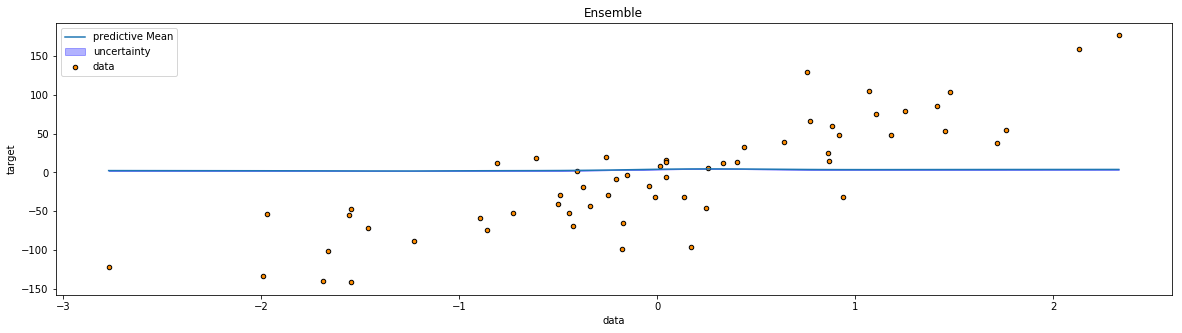

In [8]:
bootstrap_ensemble = ensembles.BootstrapEnsemble(estimator_stats = bootstrap_ensemble_stats)
plot = bootstrap_ensemble.ensemble_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))


(60,)
(60, 1)


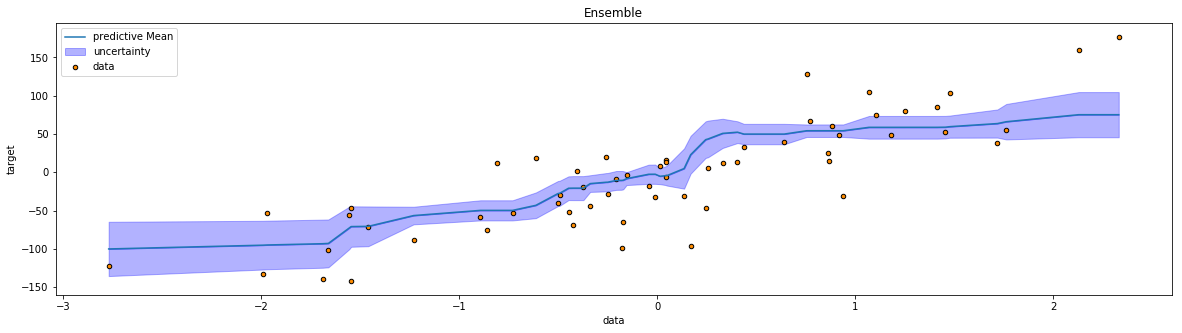

In [9]:
bootstrap_ensemble.fit(X_train,y_train)
plot = bootstrap_ensemble.ensemble_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))

In [10]:
bootstrap_ensemble.self_evaluate(X_test,y_test)


{'NLPD': -255.8304113391959,
 'correlation between error and variance': 0.23986418669775342,
 'coverage probability': 0.31666666666666665,
 'rsme': 87.7266538507437}

# DropoutNetwork

(60,)
(60, 1)


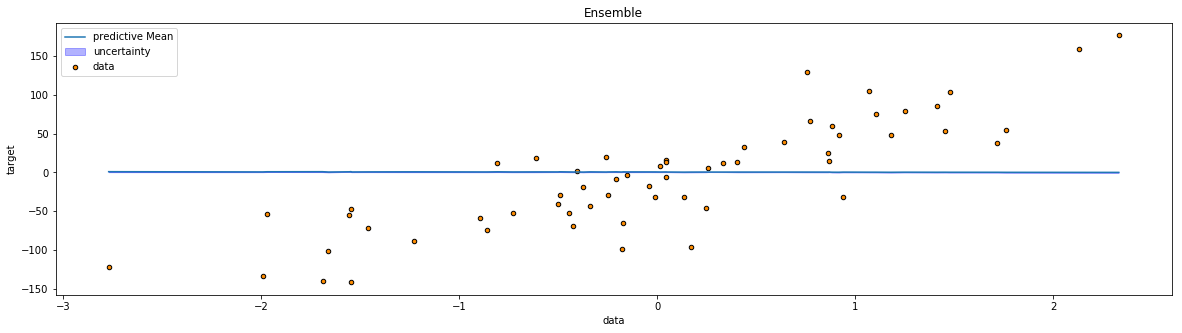

In [11]:
dropout_network = networks.DropoutNetwork(**params)
plot = dropout_network.network_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))


(60,)
(60, 1)


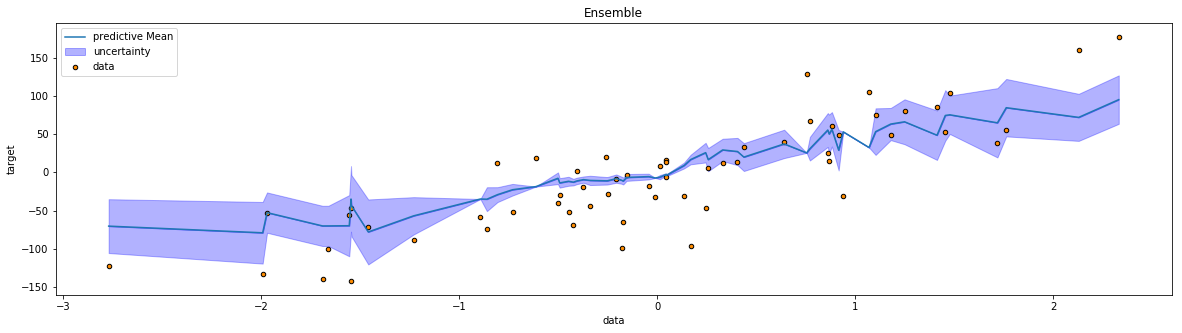

In [12]:
dropout_network.fit(X_train,y_train)
plot = dropout_network.network_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))


In [13]:
dropout_network.self_evaluate(X_test,y_test)


{'NLPD': -2210416.8742538984,
 'correlation between error and variance': 0.17464490864567025,
 'coverage probability': 0.25,
 'rsme': 83.69392373083794}

# GaussianLoss Networks

(60,)
(60, 1)


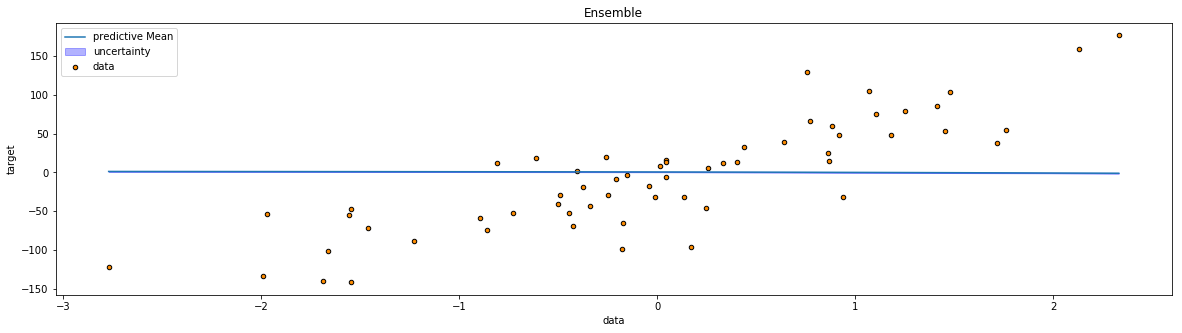

In [14]:
gl_network = networks.GaussianLossNetwork(**params)
plot = gl_network.network_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))


(60,)
(60, 1)


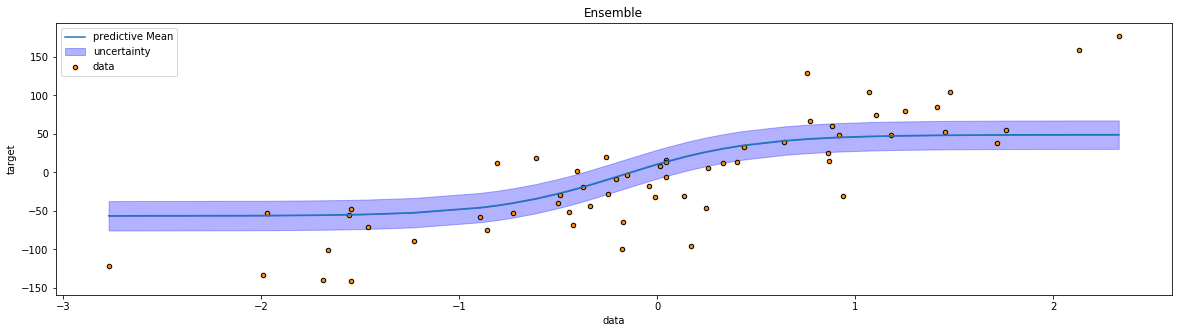

In [15]:
gl_network.fit(X_train,y_train,False)

plot = gl_network.network_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))



In [16]:
gl_network.self_evaluate(X_test,y_test)


{'NLPD': -174.5564931896182,
 'correlation between error and variance': -0.07837549957895802,
 'coverage probability': 0.38333333333333336,
 'rsme': 80.56175128753138}

# LR NEtwork

(60,)
(60, 1)


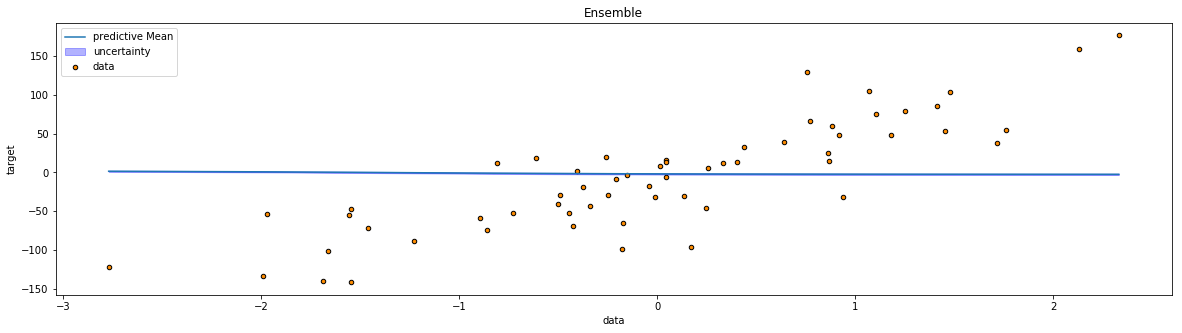

In [17]:
gl_lr_network = networks.GaussianLearningRateNetwork(**params)
plot = gl_lr_network.network_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))


In [18]:
gl_lr_network.fit(X_train,y_train)#,False)

plot = gl_lr_network.network_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))


KeyboardInterrupt: 

In [ ]:
gl_network.self_evaluate(X_test,y_test)


In [ ]:

import helpers

importlib.reload(helpers) #this is for notebooks - otherwise I have to restart the kernel every time I change anything


In [ ]:
#helpers.show_graph(gl_network.g)